# Candidate Number: A12988

## Part 1 (a)
*In this task, we are required to implement the "Metropolis-Hastings algorithm" in Python to simulate random numbers for a given probability density function.*

**1. Import Libraries**

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2. Initialize Parameters**

In [24]:
x0 = 0 # Initial value
N = 10000 # Number of iterations
s = 1 # Standard deviation

**3. Metropolis-Hastings Algorithm Implementation**

In [22]:
def metropolis_hastings(x0, N, s):
    # Initialize arrays to store samples and set initial value
    samples = np.zeros(N)
    x_prev = x0
    
    for i in range(N):
        # Generate proposal from Normal distribution
        x_star = np.random.normal(x_prev, s)
        
        # Compute acceptance ratio
        r = np.exp(-(np.abs(x_star)))/np.exp(-(np.abs(x_prev)))
        
        # Accept or reject proposal
        u = np.random.uniform(0, 1)
        if u < r:
            x_prev = x_star  # Accept proposal
        samples[i] = x_prev
    
    return samples

**4. Generate Samples: Use the implemented algorithm to generate sample: *x1*, *x2*, ... ,*xN***

In [15]:
samples = metropolis_hastings(x0, N, s)

**5. Construct Plots**

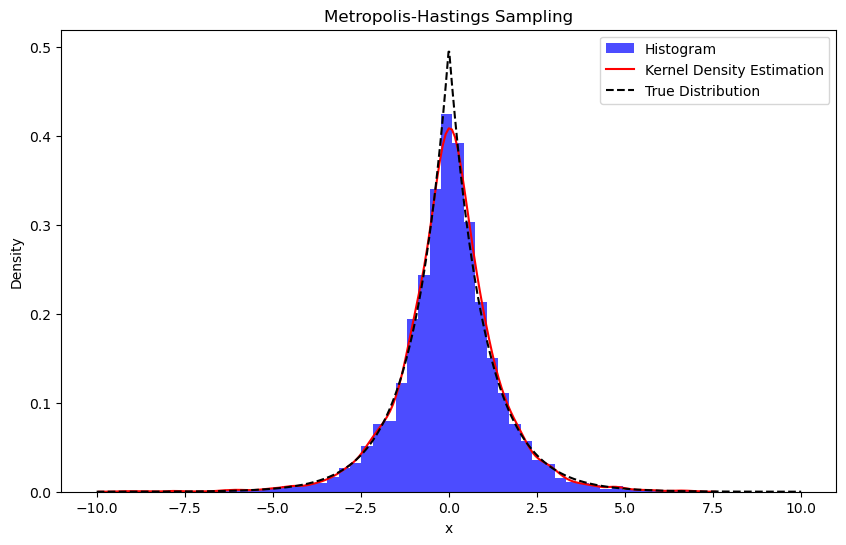

In [8]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.7, color='blue', label='Histogram')

# Plot KDE
sns.kdeplot(samples, color='red', label='Kernel Density Estimation')

# Overlay graph of f(x)
x = np.linspace(-10, 10, 1000)
f_x = 0.5 * np.exp(-np.abs(x))
plt.plot(x, f_x, 'k--', label='True Distribution')

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Metropolis-Hastings Sampling')
plt.legend()
plt.show()

**6. Compute Statistics**

In [21]:
sample_mean = np.mean(samples)
sample_std = np.std(samples)

print("Sample Mean:", sample_mean)
print("Sample Standard Deviation:", sample_std)

Sample Mean: -0.03459354395067467
Sample Standard Deviation: 1.336113449487068


## Part 1 (b)

*"In this task, we are required to build a plot of R_hat values over s values on the interval from 0.001 to 1 to indicate convergence"*

**1. First, we import libraries**

In [12]:
import numpy as np
import matplotlib.pyplot as plt

**2. We define the "Target Distribution Function"**

In [13]:
def f(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi) # "Target distribution function"

**3. We imply "Random Walk Metropolis Algorithm"**

In [14]:
def random_walk_metropolis(N, s, num_chains):
    chains = [] # list "chains" to store generated chains 

    for _ in range(num_chains):
        x = np.zeros(N)
        x[0] = np.random.normal(0, 1) # choose the value of x0

        for i in range(1, N):
            x_star = np.random.normal(x[i-1], s) # Choose xstar from Normal distr.
            r = f(x_star) / f(x[i-1]) # "Acceptance ratio"

            # Check if log of u is less than log of r
            u = np.random.uniform()
            if np.log(u) < np.log(r):
                x[i] = x_star
            else:
                x[i] = x[i-1]

        chains.append(x)

    return chains

**4. Set the parameters and initialization**

In [15]:
N = 2000 # Iterations
J = 4    # Chains
s_values = np.linspace(0.001, 1, num=100) # s values

**5. Calculate the R_hat values**

In [16]:
R_hat_values = np.zeros(len(s_values)) # Initialize an array "R_hat"

for i, s in enumerate(s_values): # Iterate over each element s in the array "s_values"
    chains = random_walk_metropolis(N, s, J) 

    M = np.mean(chains, axis=1) # "Mj as sample mean of j"
    V = np.var(chains, axis=1) # "Vj as the within sample variance of chain j"
    W = np.mean(V) # "Overall within sample variance W"
    M_overall = np.mean(M) # "Overall sample mean M"
    B = np.mean((M - M_overall)**2) # "Between sample variance B"
    R_hat_values[i] = np.sqrt((B+W) / W) # R_hat value 

**6. Plot the "values of R_hat over s values"**

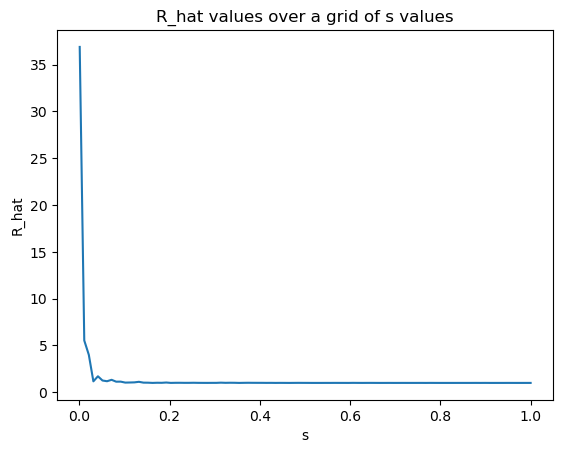

In [17]:
plt.plot(s_values, R_hat_values)
plt.xlabel('s')
plt.ylabel('R_hat')
plt.title('R_hat values over a grid of s values')
plt.show()

**7. Print the output**

In [19]:
print("R_hat value:", R_hat_values[-1])

R_hat value: 1.0011275747405024


**Conclusion: The computed R_hat value of approximately 1.001 suggests that the chains have effectively converged, indicating reliable estimates of the target distribution parameters with minimal between-chain variance.**